In [2]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
%matplotlib inline

In [25]:
data=pd.read_csv("C://Users/Public/csv/Datasets/wine.csv", header=None)
data.columns =["V"+str(i) for i in range(1, len(data.columns)+1)]

In [26]:
data                                     

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [36]:
data.V14 = data.V14.astype(str)
y = data.V14
X = data.loc[:, "V1":"V13"]


In [37]:
X.shape

(178, 13)

In [38]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


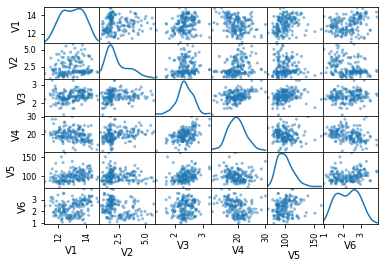

In [39]:
pd.plotting.scatter_matrix(data.loc[:, "V1":"V6"], diagonal="kde")
plt.show()

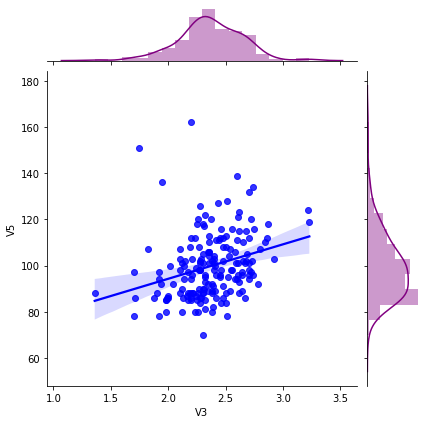

In [48]:
#positive correlation betwen 3 vs 5, 2 vs 3.  
sns.jointplot(x=data.V3, y=data.V5, joint_kws={'color':'blue'}, marginal_kws={'color':'purple'}, kind="reg")


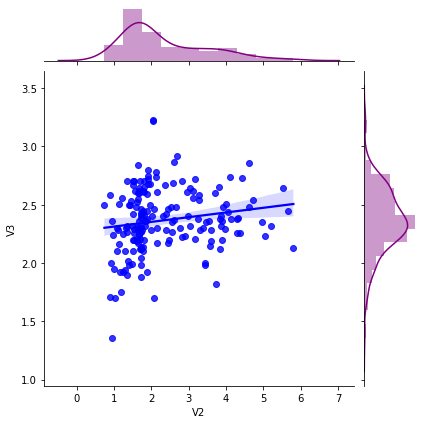

In [49]:
#positive correlation betwen 3 vs 5, 2 vs 3.  
sns.jointplot(x=data.V2, y=data.V3, joint_kws={'color':'blue'}, marginal_kws={'color':'purple'}, kind="reg")

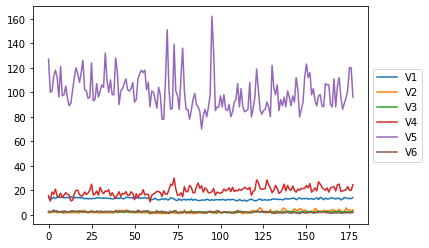

In [54]:
ax=data[["V1", "V2", "V3", "V4", "V5", "V6"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Summary statistics for Multivariate Data

In [56]:
X.apply(np.std)


V1      13.000618
V2       2.336348
V3       2.366517
V4      19.494944
V5      99.741573
V6       2.295112
V7       2.029270
V8       0.361854
V9       1.590899
V10      5.058090
V11      0.957449
V12      2.611685
V13    746.893258
dtype: float64

In [ ]:
X.apply(np.mean)

In [58]:
#just the class 2 data
class2data=data[y=="2"]

In [64]:
class2data.loc[:, :"V13"].apply(np.mean)

V1      12.278732
V2       1.932676
V3       2.244789
V4      20.238028
V5      94.549296
V6       2.258873
V7       2.080845
V8       0.363662
V9       1.630282
V10      3.086620
V11      1.056282
V12      2.785352
V13    519.507042
dtype: float64

In [65]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [67]:
printMeanAndSdByGroup(X,y)

## Means:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
V14,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Standard deviations:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
V14,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Sample sizes:


,0
V14,
1,59
2,71
3,48


#Correlations for Multivariate Data

In [68]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.028664872727911437
cor:		 0.16404546975674444


In [69]:
corrmat = X.corr()
corrmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
V1,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
V2,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
V3,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
V4,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
V5,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
V6,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
V7,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
V8,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
V9,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
V10,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


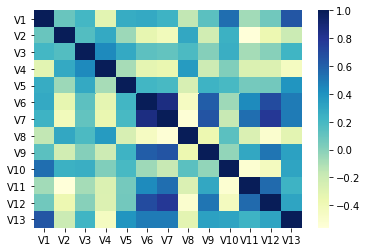

In [78]:
sns.heatmap(corrmat, cmap="YlGnBu")


In [79]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [80]:
mosthighlycorrelated(X,10)

,FirstVariable,SecondVariable,Correlation
0,V6,V7,0.864564
1,V7,V12,0.787194
2,V6,V12,0.699949
3,V7,V9,0.652692
4,V1,V13,0.643720
5,V6,V9,0.612413
6,V11,V12,0.565468
7,V2,V11,-0.561296
8,V1,V10,0.546364
9,V7,V11,0.543479


In [81]:
# standardize the variables
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)



In [82]:
standardisedX.apply(np.mean)

V1    -8.619821e-16
V2    -8.357859e-17
V3    -8.657245e-16
V4    -1.160121e-16
V5    -1.995907e-17
V6    -2.972030e-16
V7    -4.016762e-16
V8     4.079134e-16
V9    -1.699639e-16
V10   -1.247442e-18
V11    3.717376e-16
V12    2.919013e-16
V13   -7.484650e-18
dtype: float64

#PRINCIPAL COMPONENT ANALYSIS

In [83]:
pca = PCA().fit(standardisedX)

In [84]:
# SUMMARY PCA results
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [85]:
summary=pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.169297,0.361988,0.361988
PC2,1.580182,0.192075,0.554063
PC3,1.202527,0.111236,0.665300
PC4,0.958631,0.070690,0.735990
PC5,0.923704,0.065633,0.801623
PC6,0.801035,0.049358,0.850981
PC7,0.742313,0.042387,0.893368
PC8,0.590337,0.026807,0.920175
PC9,0.537476,0.022222,0.942397


In [86]:
summary.sdev

,Standard deviation
PC1,2.169297
PC2,1.580182
PC3,1.202527
PC4,0.958631
PC5,0.923704
PC6,0.801035
PC7,0.742313
PC8,0.590337
PC9,0.537476
PC10,0.500902


In [87]:
# total variaables should be equal to 13
np.sum(summary.sdev**2)

Standard deviation    13.0
dtype: float64

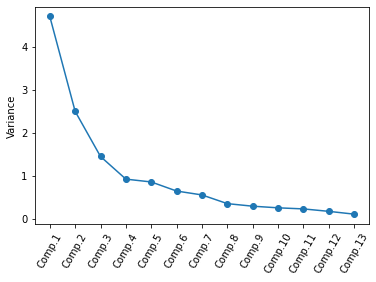

In [88]:
# The first way: deciding how many principal components to retain
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

In [89]:
# The second way: Kaiser’s criterion: that we should only retain principal components for which the variance is above 1 
summary.sdev**2

,Standard deviation
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


In [91]:
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

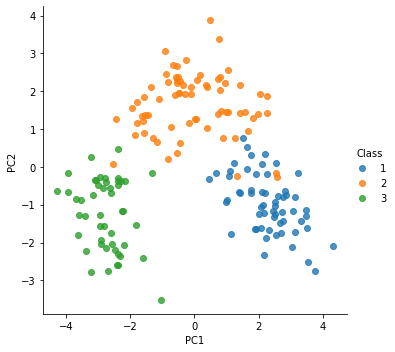

In [90]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)